# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as mno
import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sb


# 2. Read Dataset

In [2]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.shape

(17414, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [6]:
#Chek for missing values
df.isnull().sum()


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
duplicates = df.duplicated().any()
duplicates

False

# 4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [8]:
# Sezon sozlugunu sezon sayisal sutunuyla esledim

df['season'].replace({3.0: 'winter',0.0: 'spring',1.0: 'summer',2.0: 'fall'}, inplace=True)
# Is Holiday
df['is_holiday'].replace(1.0, 'Holiday', inplace=True)
df['is_holiday'].replace(0.0, 'Non-holiday', inplace=True)
#Is Weekend
df['is_weekend'].replace(1.0, 'Weekend', inplace=True)
df['is_weekend'].replace(0.0, 'Non-weekend', inplace=True)
#Weather_Code
df['weather_code'] = df['weather_code'].replace({1.0: 'Clear', 2.0: 'scatte red clouds',
                                                 3.0: 'Broken Clouds',4.0:'Cloudy',7.0: 'Rain',
                                               10.0: 'rain with thunderstorm', 26.0: 'snowfall',
                                                94.0: 'Freezing Fog'})

In [9]:
df.season.value_counts()

season
spring    4394
summer    4387
winter    4330
fall      4303
Name: count, dtype: int64

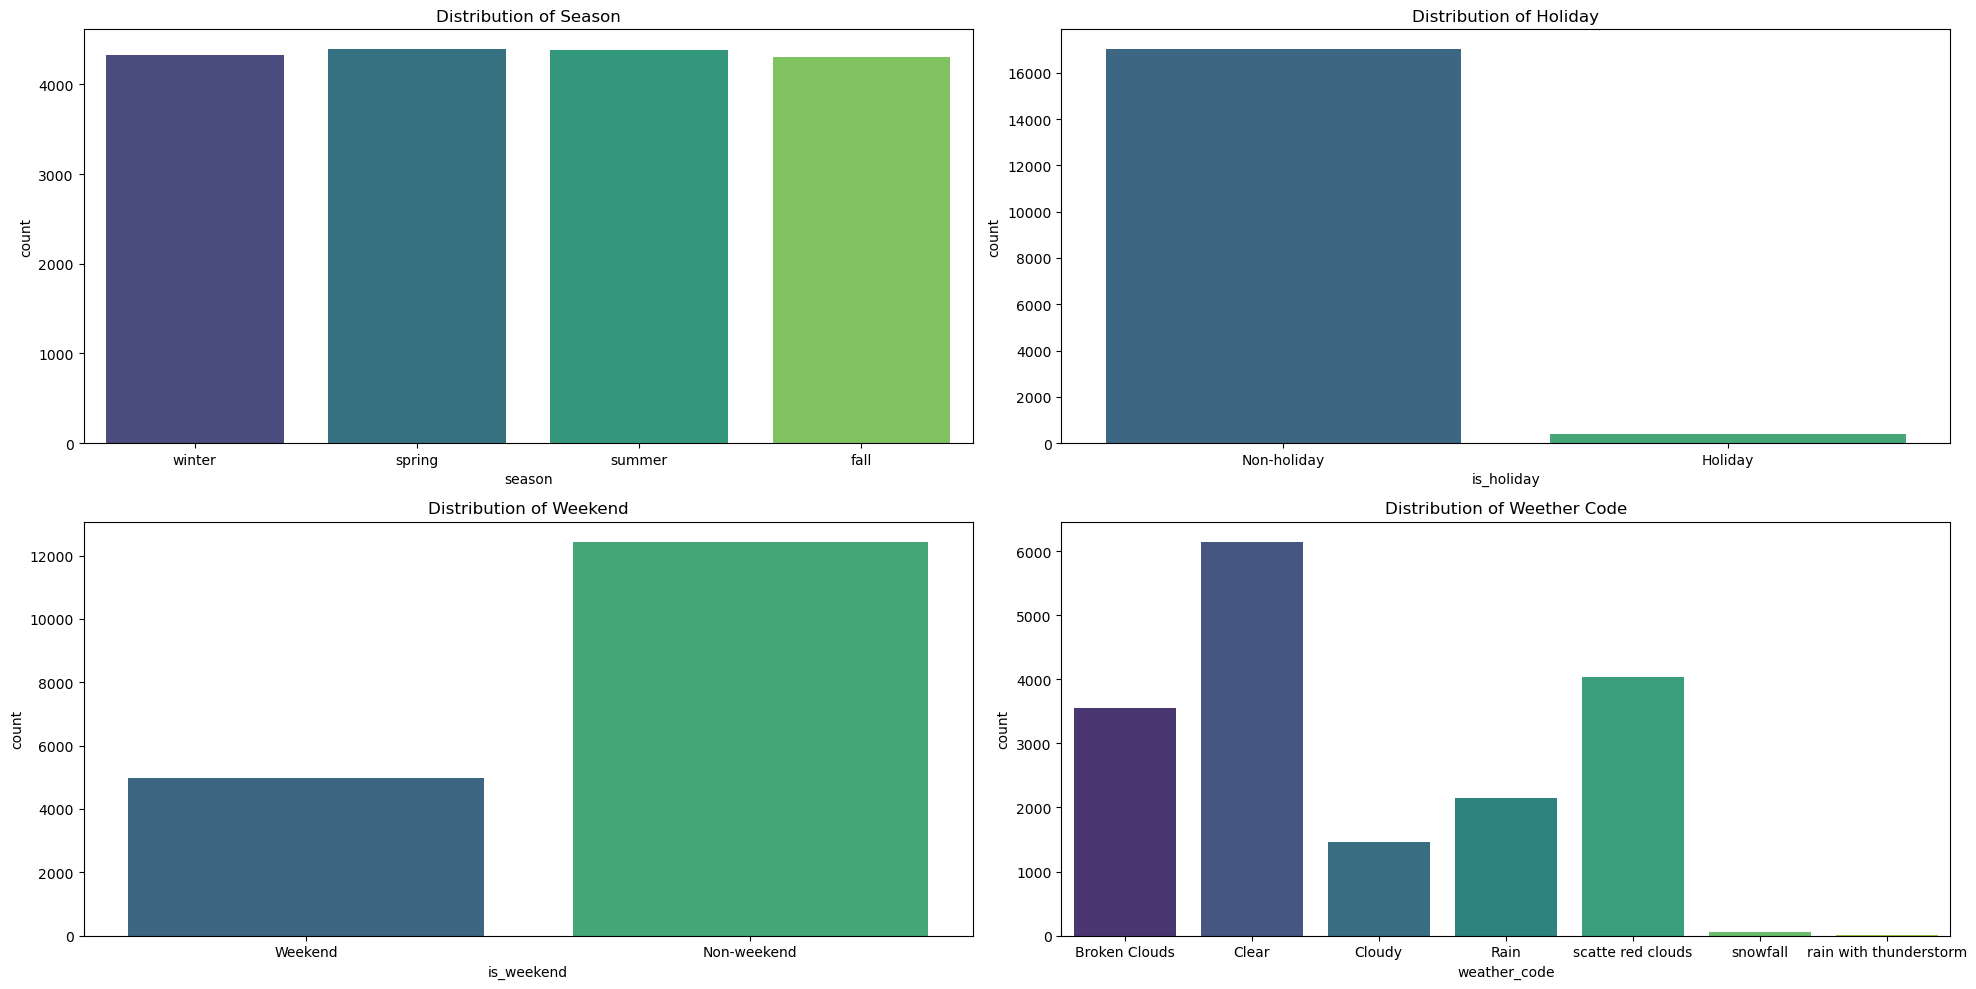

In [10]:
plt.figure(figsize=(20,10))

 #plot season
plt.subplot(2, 2, 1)
sns.countplot(x='season', data=df, palette='viridis')
plt.title('Distribution of Season', color='black')

#Plot of Holiday
plt.subplot(2, 2, 2)
sns.countplot(x='is_holiday', data=df, palette='viridis')
plt.title('Distribution of Holiday', color = 'black')

#Plot of Weekend
plt.subplot(2, 2, 3)
sns.countplot(x='is_weekend', data=df, palette='viridis')
plt.title('Distribution of Weekend', color = 'black')


#Plot of Weateher Code
plt.subplot(2, 2, 4)
sns.countplot(x='weather_code', data=df, palette='viridis')
plt.title('Distribution of Weether Code', color= 'black')

plt.tight_layout()
plt.show()


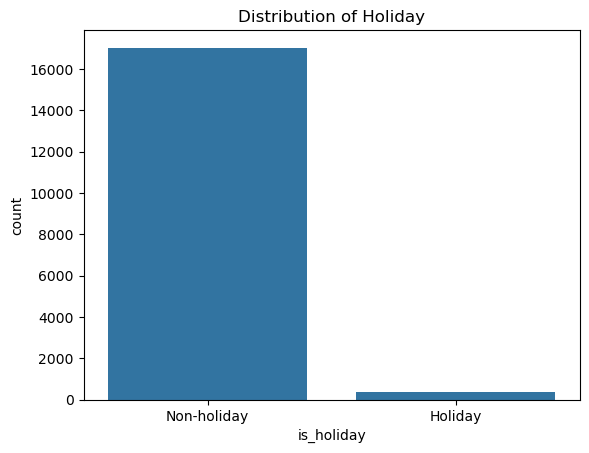

In [11]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = 'is_holiday')
ax.set_title("Distribution of Holiday", color="black")

plt.show()

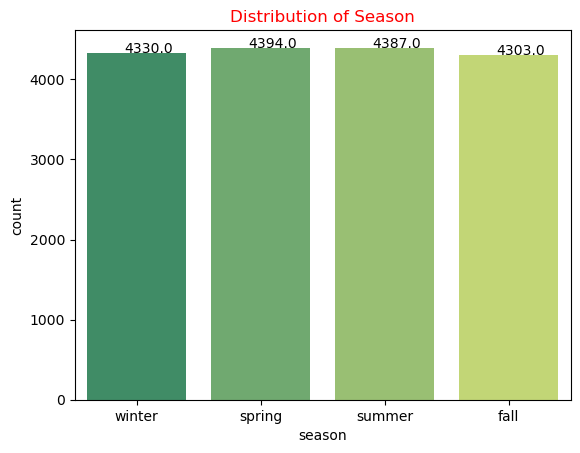

In [12]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = 'season', palette="summer")
ax.set_title("Distribution of Season", color="red")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.6))

plt.show()

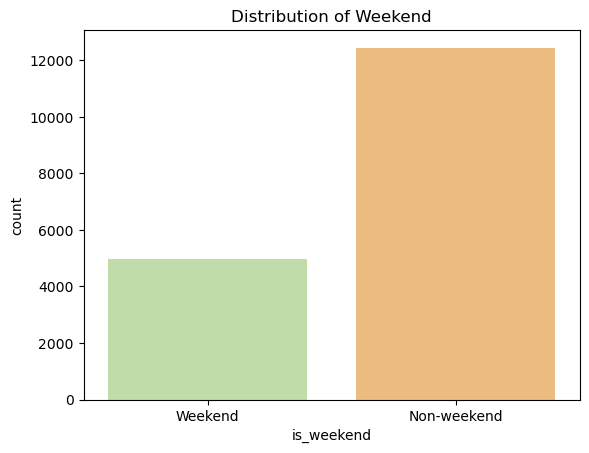

In [13]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = 'is_weekend',palette="Spectral_r")
ax.set_title("Distribution of Weekend", color="black")


plt.show()

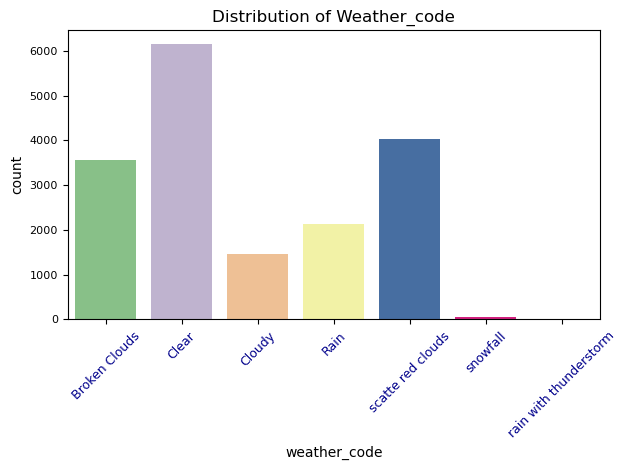

In [14]:
fig, ax = plt.subplots()
ax = sns.countplot(data = df, x = "weather_code", palette="Accent")

    
plt.xticks(rotation=45, color='darkblue')
plt.tick_params(axis='x', labelsize=9)
plt.tick_params(axis='y', labelsize=8)
ax.set_title("Distribution of Weather_code", color= "black")
plt.tight_layout()
plt.show()

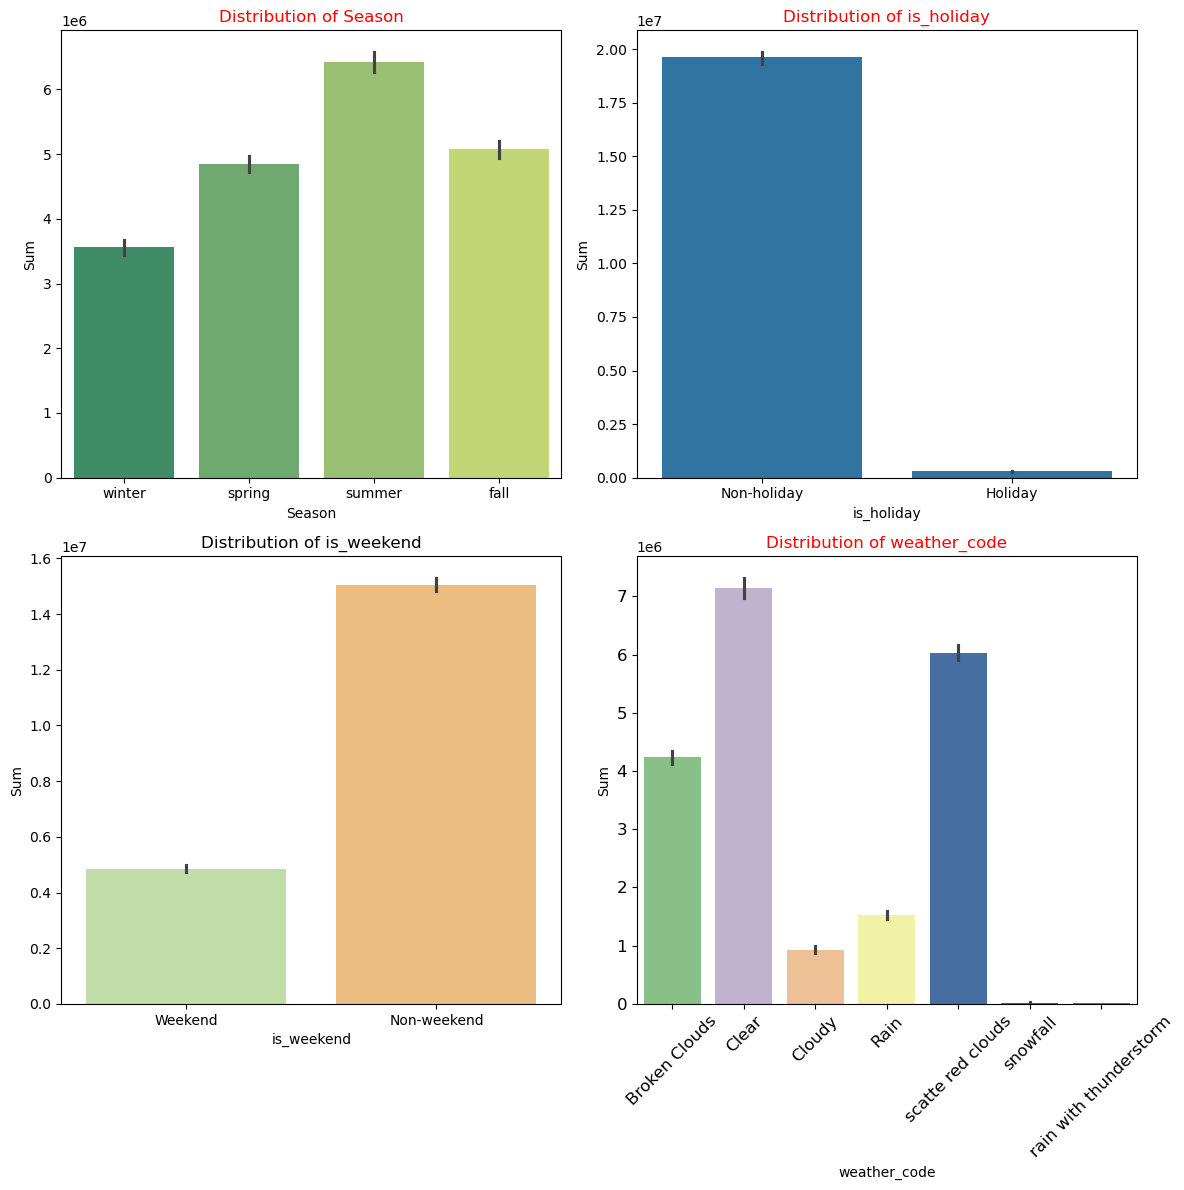

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))


#Plot by Holiday
sns.barplot(data=df, x='is_holiday', y='cnt', estimator=sum, ax=ax[0][1])
ax[0][1].set_xlabel('is_holiday')
ax[0][1].set_ylabel('Sum')
ax[0][1].set_title('Distribution of is_holiday', color="red")

                  
                  
    
    #Plot by Season
sns.barplot(data=df, x="season", y='cnt', estimator=sum, ax=ax[0][0], palette="summer")
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Sum')
ax[0][0].set_title('Distribution of Season', color="red")




#Plot by Weekend
sns.barplot(data=df, x='is_weekend', y='cnt', estimator=sum, ax=ax[1][0], palette="Spectral_r")
ax[1][0].set_xlabel('is_weekend')
ax[1][0].set_ylabel('Sum')
ax[1][0].set_title('Distribution of is_weekend', color= "black")




#Plot by weather code
sns.barplot(data=df, x="weather_code", y='cnt', estimator=sum, ax=ax[1][1], palette="Accent")
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Sum')
ax[1][1].set_title('Distribution of weather_code', color="red")
ax[1][1].tick_params(axis='x', labelsize=12, rotation=45)
ax[1][1].tick_params(axis='y', labelsize=12)






plt.tight_layout()
plt.show()

In [16]:
# While bicycle use reaches the highest value in Clear and partly Cloudy Weather,
#It reaches the lowest value in Rainy, Snowy and Stormy Weather.

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

In [17]:
df = pd.read_csv("store_sharing.csv")
print("Data Types:")
print(df.dtypes)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=False)
print("Dataframe after setting the index:")
df.head()

Data Types:
timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object
Dataframe after setting the index:


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [18]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [19]:
df['timestamp']

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [20]:
type(df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [22]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [23]:
df['timestamp'].dtype

dtype('<M8[ns]')

In [29]:
df.set_index('timestamp', inplace=True)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year
timestamp,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2024
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2024
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2024
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2024
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2024
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2024
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2024
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2024


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

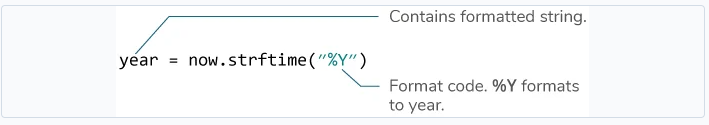

In [30]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [31]:
df.index.year

Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='timestamp', length=17414)

In [32]:
df.index.max()-df.index.min()

Timedelta('730 days 23:00:00')

In [33]:
df.index.year.max()- df.index.year.min()

2

In [34]:
f = lambda x:x.strftime("%Y-%m")

In [35]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['year_month']=f(df.index)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year          17414 non-null  int32  
 10  hour          17414 non-null  int32  
 11  day_of_week   17414 non-null  int32  
 12  day_of_month  17414 non-null  int32  
 13  month         17414 non-null  int32  
 14  year_month    17414 non-null  object 
dtypes: float64(8), int32(5), int64(1), object(1)
memory usage: 1.8+ MB


In [37]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0,6,4,1,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2,6,4,1,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3,6,4,1,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4,6,4,1,2015-01


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [38]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['year_month'], dtype='object')


In [39]:
for column in non_numeric_columns:
    print(f"\nUnique values in'{column}':")
    print(df[column].unique())


Unique values in'year_month':
['2015-01' '2015-02' '2015-03' '2015-04' '2015-05' '2015-06' '2015-07'
 '2015-08' '2015-09' '2015-10' '2015-11' '2015-12' '2016-01' '2016-02'
 '2016-03' '2016-04' '2016-05' '2016-06' '2016-07' '2016-08' '2016-09'
 '2016-10' '2016-11' '2016-12' '2017-01']


In [40]:
df_cleaned = df.drop(columns=non_numeric_columns)
df_cleaned

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,19,1,3,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,20,1,3,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,21,1,3,1


In [41]:
corr_matrix = df_cleaned.corr()

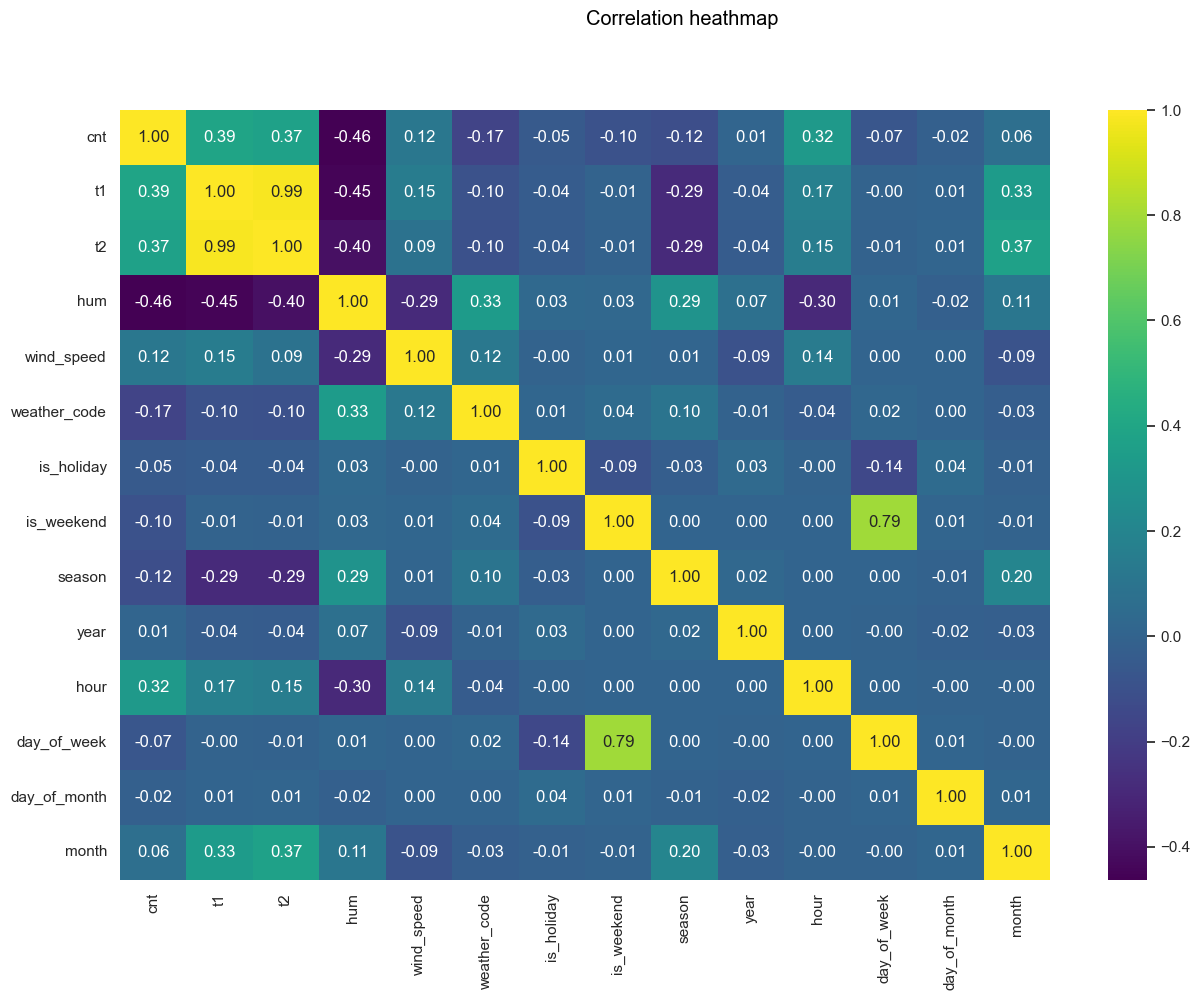

In [116]:
plt.figure(figsize=(15,10))
plt.suptitle("Correlation heathmap", color="black")
sns.heatmap(corr_matrix, fmt=".2f", annot=True, cmap="viridis")
plt.show()

In [54]:
target_var='your_target_variable'
corr_with_target = corr_matrix[['cnt']].sort_values(by='cnt', ascending=False)

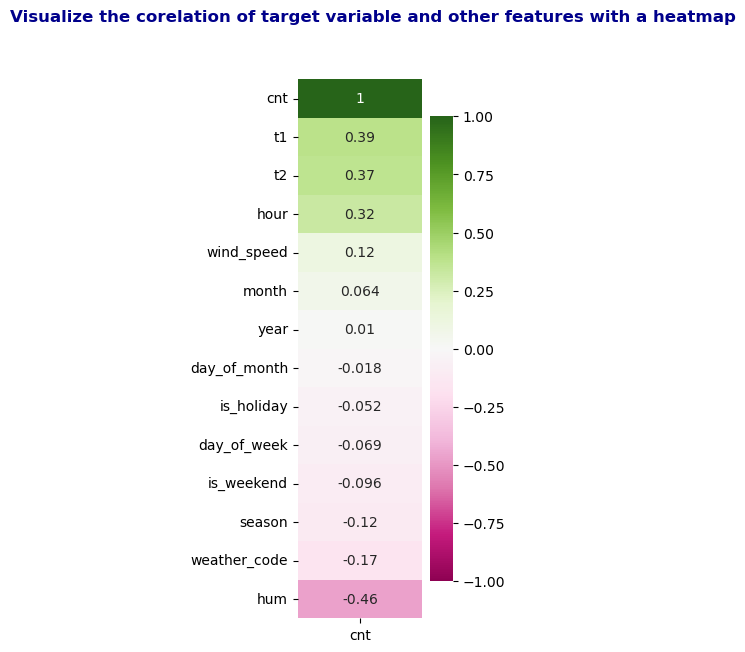

In [55]:
plt.figure(figsize=(2,7))
plt.suptitle('Visualize the corelation of target variable and other features with a heatmap',
            color="darkblue", fontweight= "bold")
sns.heatmap(corr_with_target, annot=True, cmap="PiYG", vmin=-1, vmax=1)
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

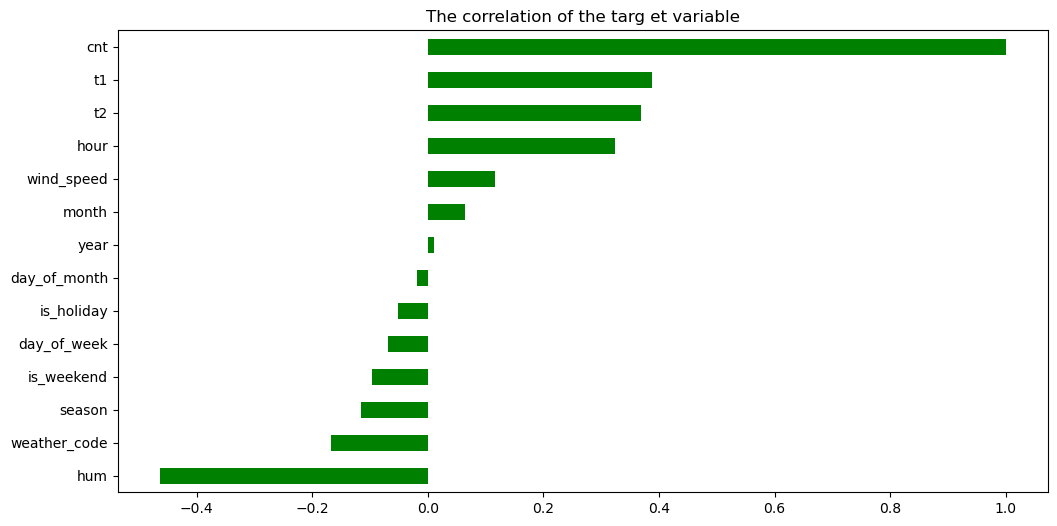

In [58]:
plt.figure(figsize=(12,6))
plt.title("The correlation of the targ et variable")
corr_matrix['cnt'].sort_values().plot.barh(color = "green")
plt.show()


<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

In [59]:
df.reset_index(inplace=True)

In [60]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,year_month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0,6,4,1,2015-01
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,4,1,2015-01
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2,6,4,1,2015-01
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3,6,4,1,2015-01
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4,6,4,1,2015-01


In [61]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season', 'year', 'hour', 'day_of_week',
       'day_of_month', 'month', 'year_month'],
      dtype='object')

In [62]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dropna(subset=['timestamp','cnt'], inplace=True)

In [63]:
sns.set(style='whitegrid')

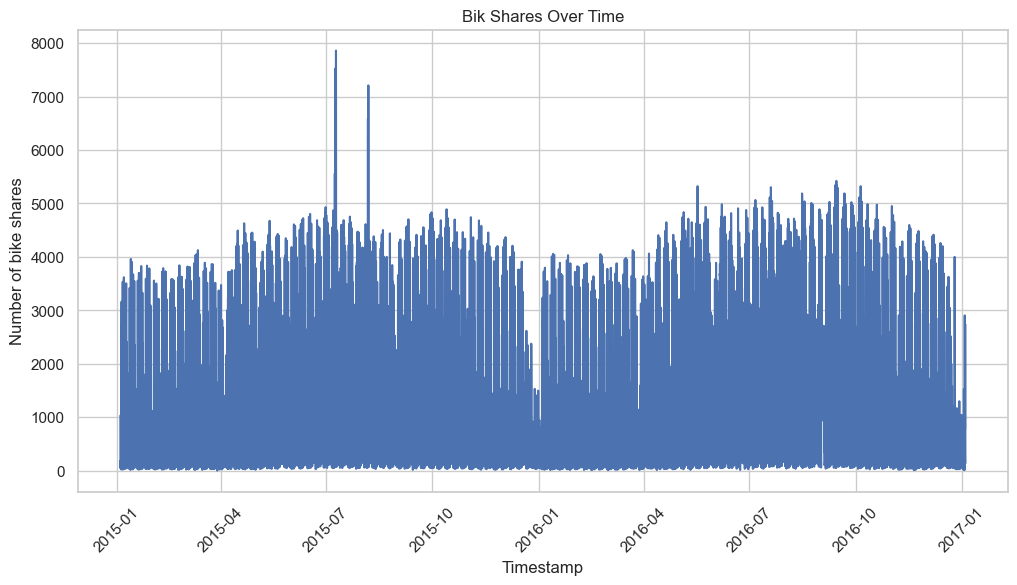

In [64]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='timestamp', y = 'cnt')
plt.title('Bik Shares Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of bike shares')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [65]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

In [66]:
daily_counts = df.groupby(df['timestamp'].dt.date)['cnt'].sum()
daily_counts

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Name: cnt, Length: 730, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

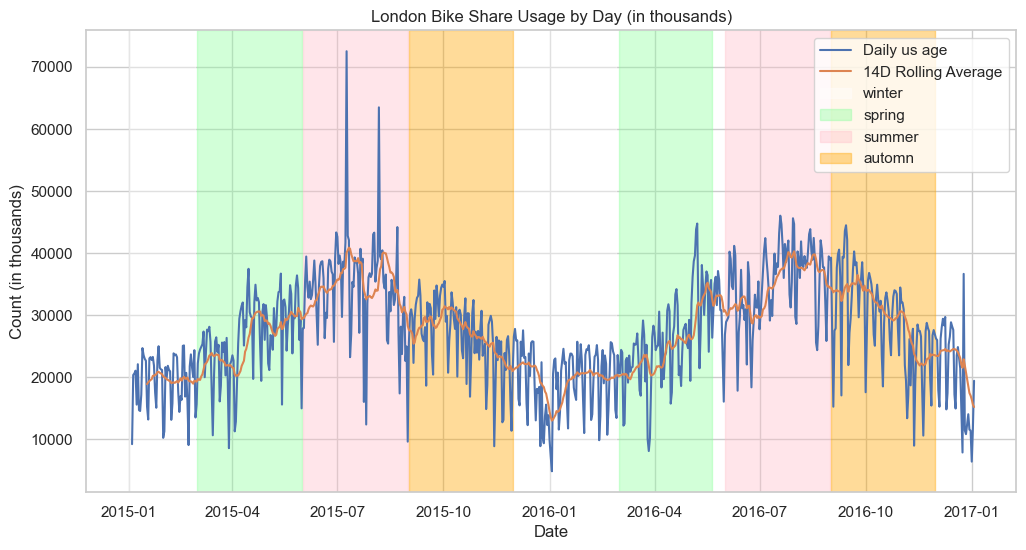

In [67]:
plt.figure(figsize=(12,6))
plt.plot(daily_counts, label='Daily us age')
plt.plot(daily_counts.rolling(window=14).mean(), label='14D Rolling Average')

plt.title('London Bike Share Usage by Day (in thousands)')
plt.xlabel('Date')
plt.ylabel('Count (in thousands)')

plt.axvspan('2015-01-01', '2015-02-28', color='white', alpha=0.4, label="winter")
plt.axvspan('2015-03-01', '2015-05-31', color='xkcd:mint green', alpha=0.4, label="spring")
plt.axvspan('2015-06-01', '2015-08-31', color='pink', alpha=0.4, label="summer")
plt.axvspan('2015-09-01', '2015-11-30', color='orange', alpha=0.4, label="automn")
plt.axvspan('2015-12-01', '2016-02-28', color='white', alpha=0.4)
plt.axvspan('2016-03-01', '2016-05-21', color='xkcd:mint green', alpha=0.4)
plt.axvspan('2016-06-01', '2016-08-31', color='pink', alpha=0.4)
plt.axvspan('2016-09-01', '2016-11-30', color='orange', alpha=0.4)


plt.legend()
plt.show


<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [68]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.dropna(subset=['timestamp'], inplace=True)
df['day_of_month'] = df['timestamp'].dt.day
montly_shares = df.groupby('day_of_month', as_index=False)['cnt'].sum()
montly_shares

,day_of_month,cnt
0,1,619537
1,2,600641
2,3,635968
3,4,658083
4,5,652522
5,6,697667
6,7,684249
7,8,696937
8,9,725225
9,10,665536


In [69]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
monthly_shares = df.groupby(['year', 'month'])['cnt'].sum().reset_index()
df.dtypes
monthly_shares.head()

,year,month,cnt
0,2015,1,546639
1,2015,2,543594
2,2015,3,695934
3,2015,4,831582
4,2015,5,895413


In [70]:
sns.set(style="whitegrid")

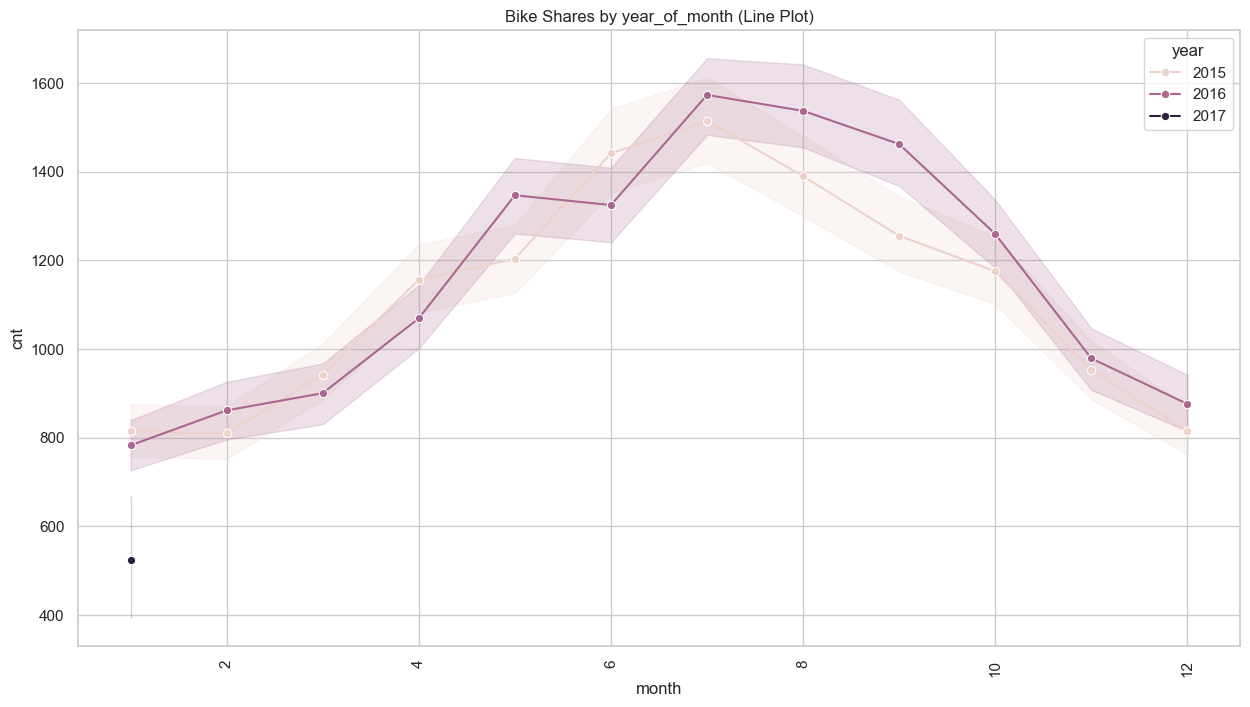

In [71]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='month', y='cnt', hue='year', marker='o')
plt.title('Bike Shares by year_of_month (Line Plot)')

plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=90)

plt.show()

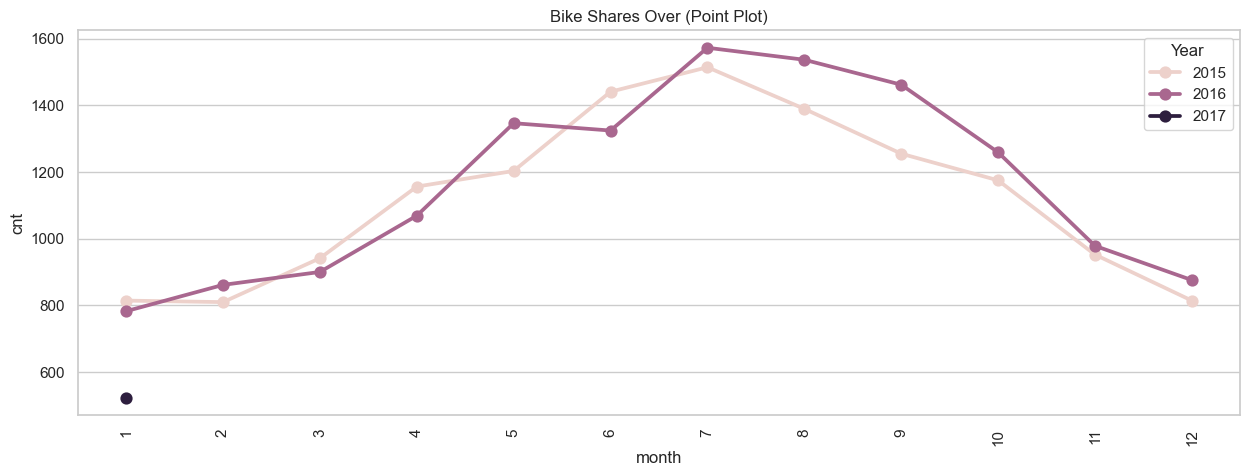

In [72]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
sns.pointplot(data=df, x='month', y='cnt', hue='year', ci=None)
plt.title('Bike Shares Over (Point Plot)')

plt.xticks(rotation=90)
plt.legend(title='Year')
plt.show()

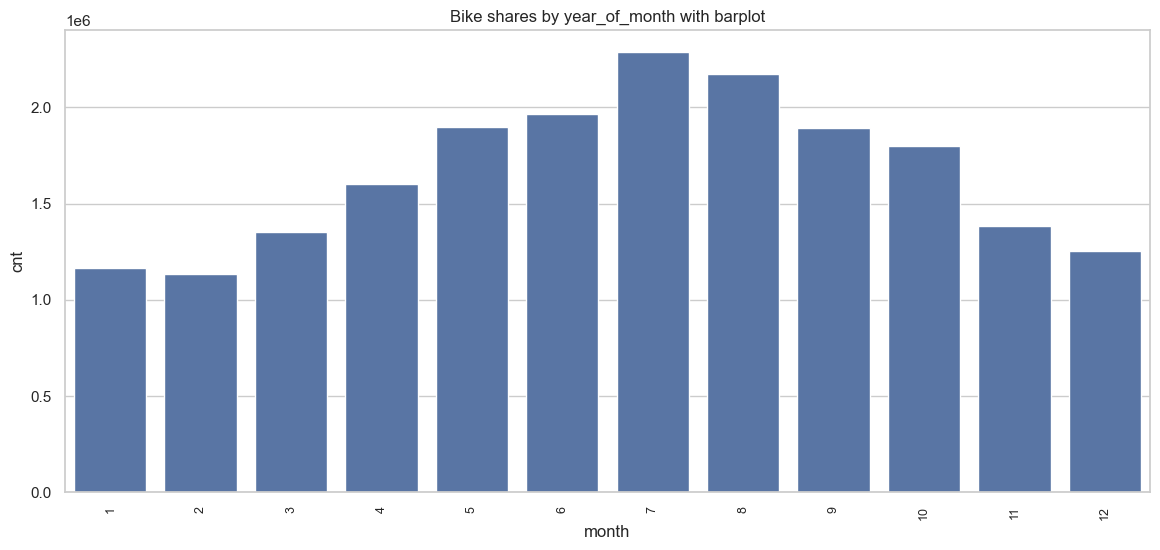

In [73]:
plt.figure(figsize=(14,6))
plt.title("Bike shares by year_of_month with barplot")
ax=sns.barplot(x='month', y='cnt', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90, fontsize= 9)

plt.show()

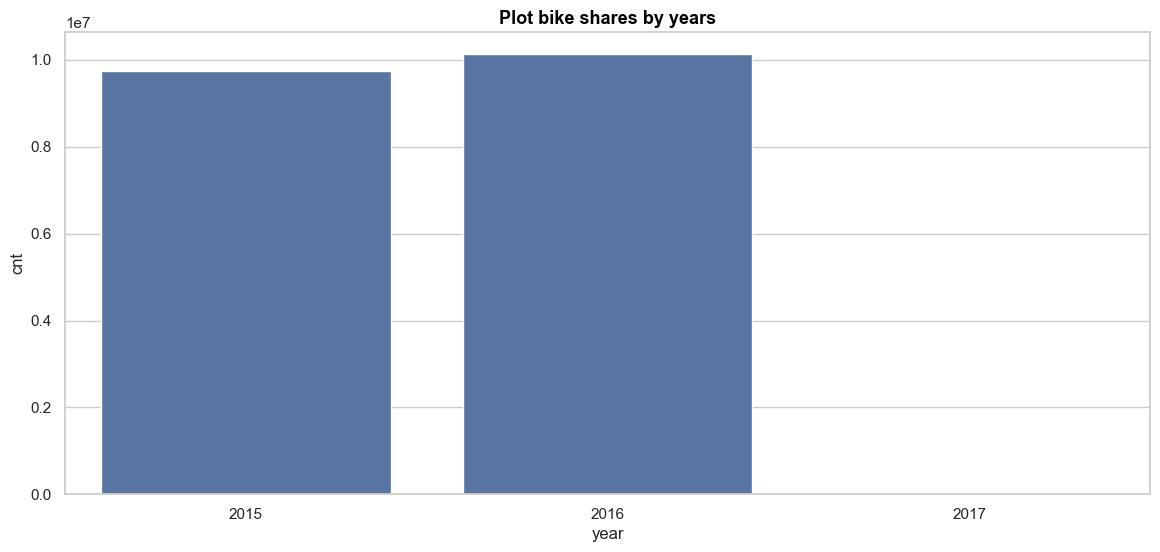

In [74]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x='year', y='cnt', data=df, estimator=sum, ci=None)
plt.title("Plot bike shares by years", color= "black", fontsize= 13, fontweight="bold")

plt.show()

In [ ]:
# Bicycle use reaches its maximum in the summer month of 2015 and 2016(June,July and August).
#It decreases in the winter months of December, January and February.
# In the year of 2017 the bike share was a low percentage which resulted in no graph being visible.

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [75]:
hourly_shares = df.groupby(['hour', 'is_holiday','is_weekend', 'season'], as_index=False)['cnt'].sum()
hourly_shares.head()

,hour,is_holiday,is_weekend,season,cnt
0,0,0.0,0.0,0.0,21129
1,0,0.0,0.0,1.0,38983
2,0,0.0,0.0,2.0,26997
3,0,0.0,0.0,3.0,18886
4,0,0.0,1.0,0.0,21808


In [76]:
sns.set(style="whitegrid")

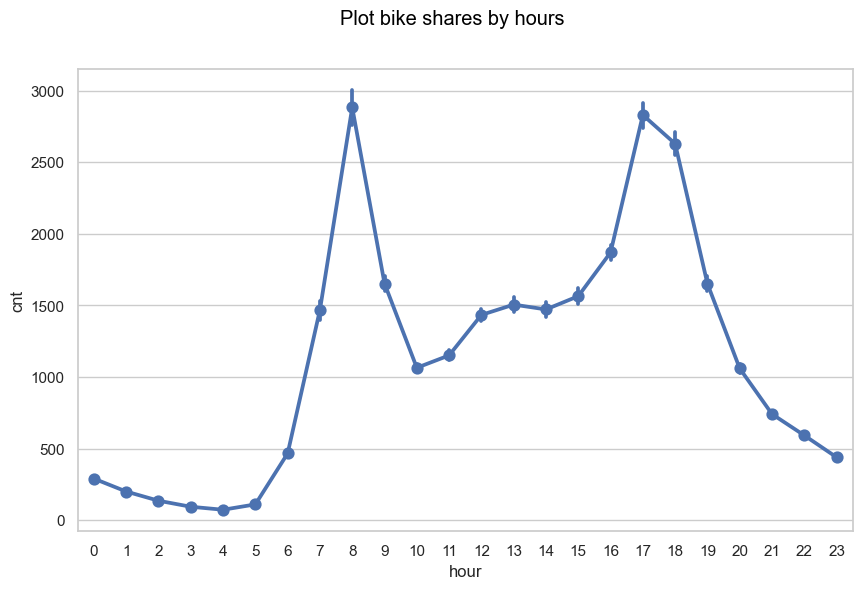

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.suptitle("Plot bike shares by hours", color="black",)
sns.pointplot(data=df, x='hour', y='cnt')

plt.show()

In [ ]:
# The graph shows that bicycle usage rises at early hours and late afternoons.

In [78]:
df[(df.is_weekend==1)&(df.season==2.0)].groupby("season")["is_weekend"].count()

season
2.0    1226
Name: is_weekend, dtype: int64

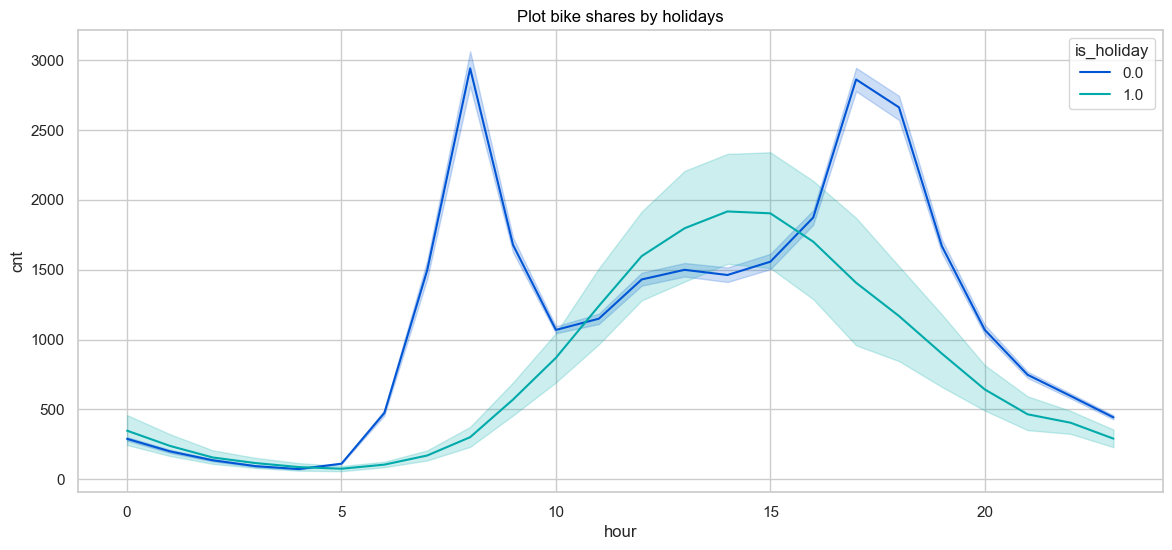

In [79]:
plt.figure(figsize=(14, 6))
plt.title("Plot bike shares by holidays", color= "black")
sns.lineplot(x='hour', y='cnt', data=df, hue='is_holiday', palette="winter")
plt.show()

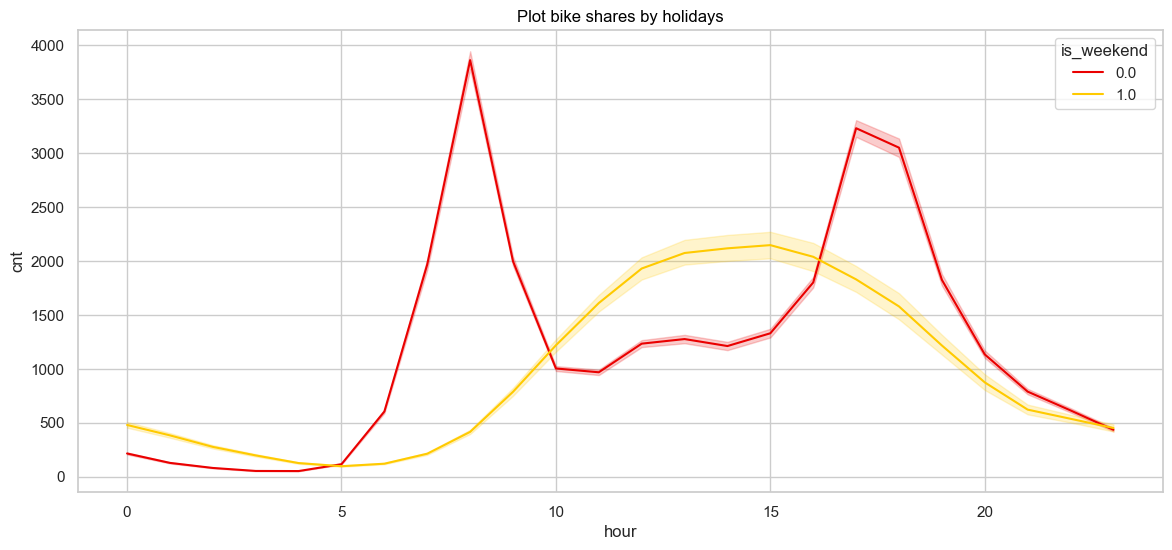

In [80]:
plt.figure(figsize=(14, 6))
plt.title("Plot bike shares by holidays", color= "black")
sns.lineplot(x='hour', y='cnt', data=df, hue='is_weekend', palette= "hot")
plt.show()

In [ ]:
# The graph shows that the data for holidays and weekends are quite similar,
# and weekdays and non-holidays are also similar.

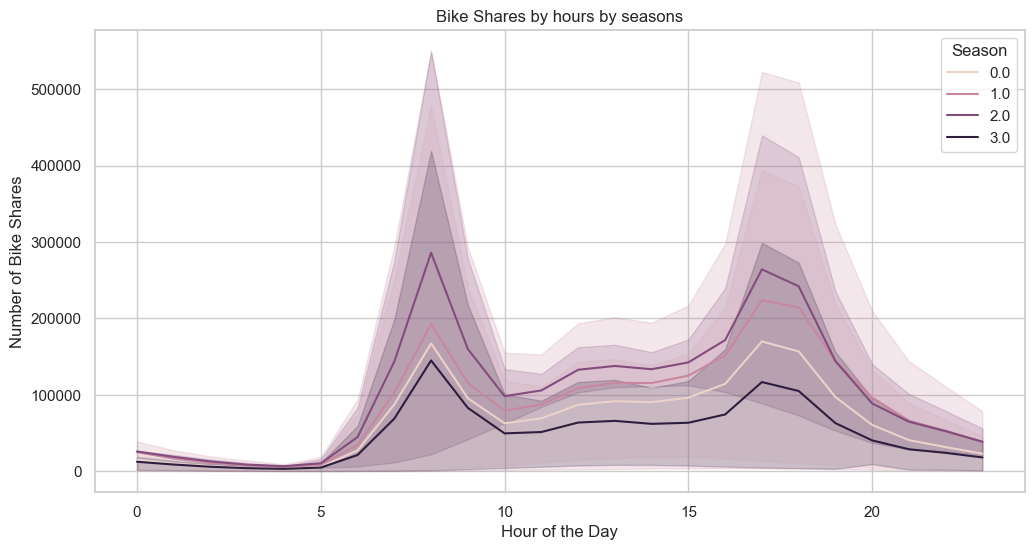

In [81]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_shares, x='hour', y ='cnt', hue='season')
plt.title('Bike Shares by hours by seasons')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.legend(title='Season')
plt.grid(True)
plt.show()

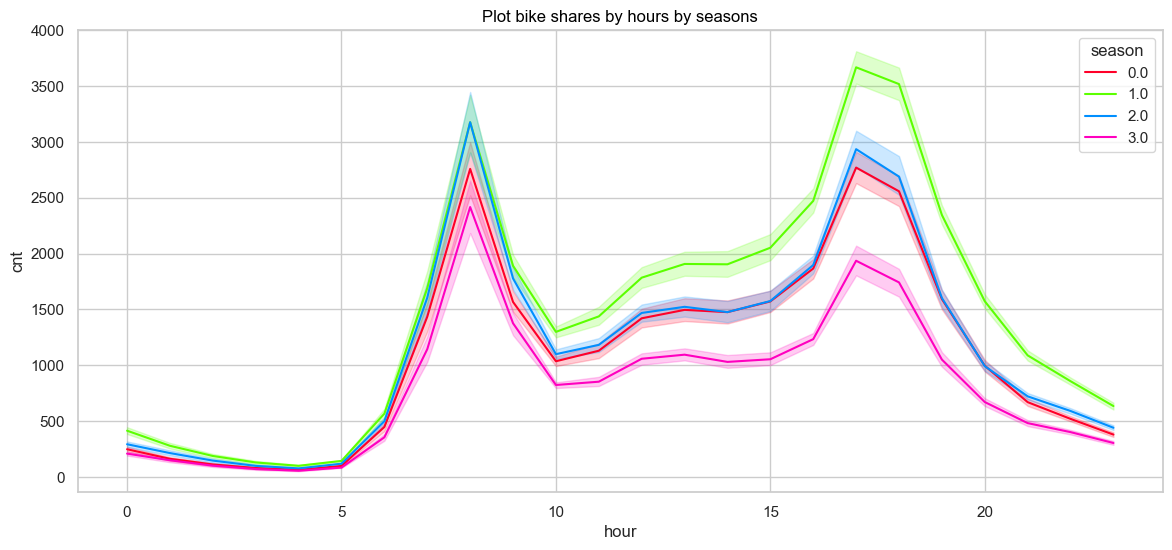

In [82]:
plt.figure(figsize=(14,6))
plt.title("Plot bike shares by hours by seasons", color= "black")
sns.lineplot(x='hour', y='cnt', data=df, hue='season', palette="gist_rainbow")
plt.show()

In [ ]:
# The graph shows that bicycle usage is at a rise in summer during evening hours compared to other
# seasons, on the other hand during winter months the bicycle usage in evenings is far less
# compared to the other seasons. Spring and Fall were quite similar to general weekdays data.
# seasonal dates are similar to weekdays data.

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

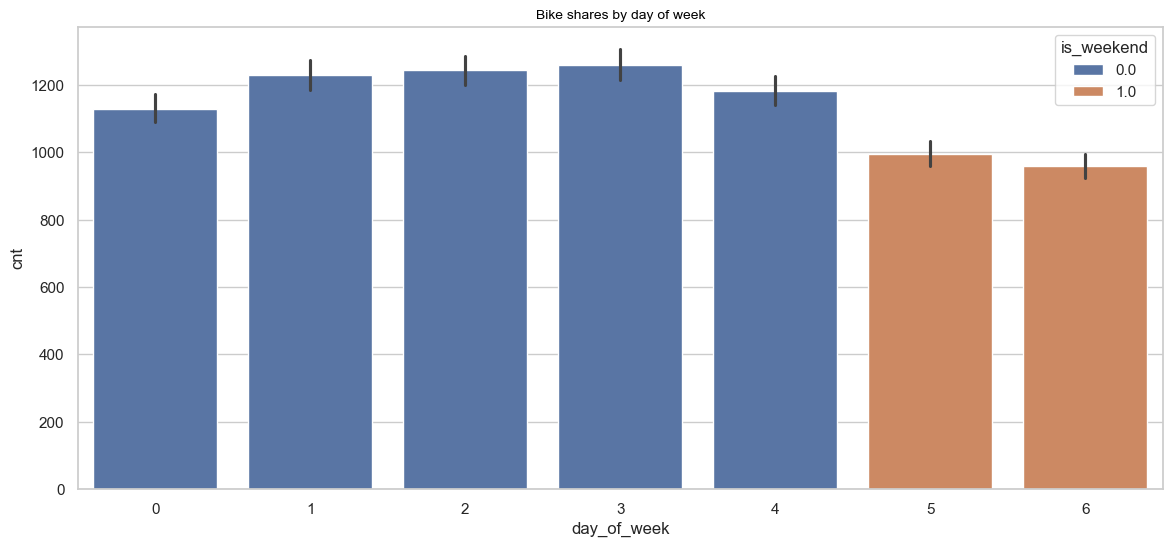

In [83]:
plt.figure(figsize=(14,6))
plt.title("Bike shares by day of week", color= "black", fontsize = 10)
sns.barplot(x="day_of_week", y = 'cnt', data=df, hue="is_weekend")
plt.show()

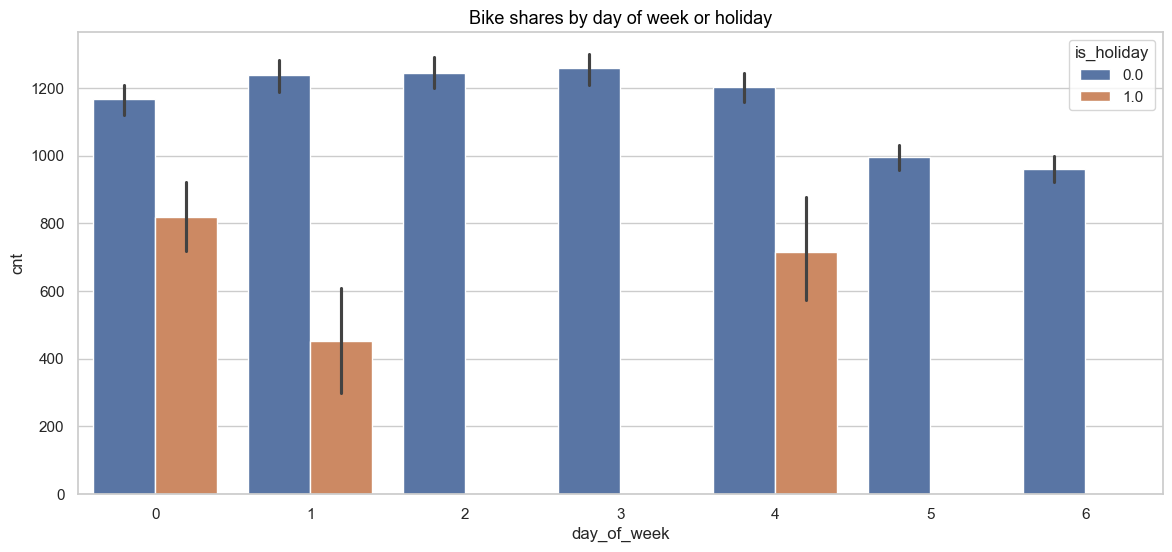

In [84]:
plt.figure(figsize=(14, 6))
plt.title("Bike shares by day of week or holiday", color= "black", fontsize=13)
sns.barplot(x="day_of_week", y='cnt', data=df, hue="is_holiday")
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

In [85]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.dropna(subset=['timestamp'], inplace=True)
df['day_of_month'] = df['timestamp'].dt.day
montly_shares = df.groupby('day_of_month', as_index=False)['cnt'].sum()
montly_shares

,day_of_month,cnt
0,1,619537
1,2,600641
2,3,635968
3,4,658083
4,5,652522
5,6,697667
6,7,684249
7,8,696937
8,9,725225
9,10,665536


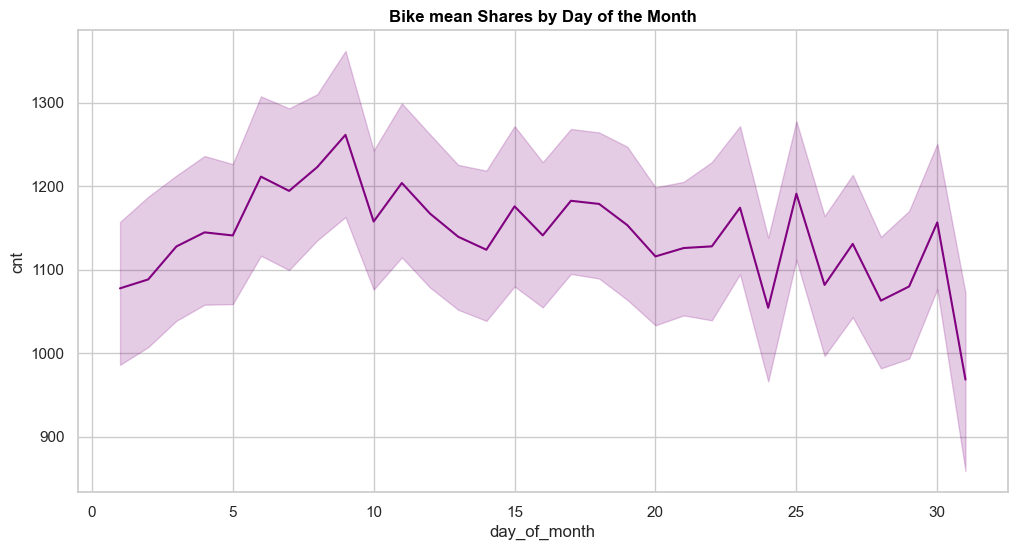

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='day_of_month', y='cnt', color= "purple")
plt.title('Bike mean Shares by Day of the Month', color="black", fontweight='bold')

plt.grid(True)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

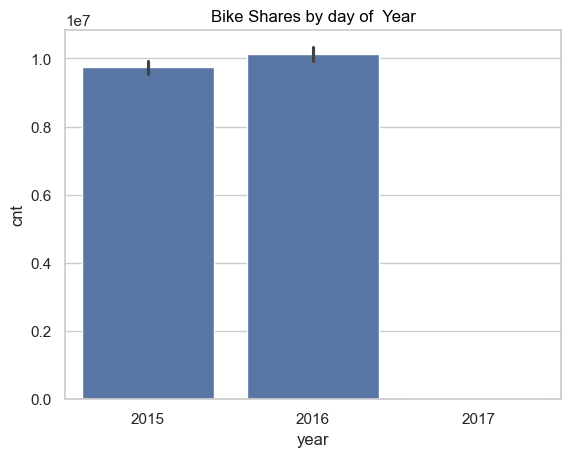

In [87]:
sns.barplot(data=df, x='year', y='cnt', estimator=sum)
plt.title('Bike Shares by day of  Year', color= "black")
plt.show()

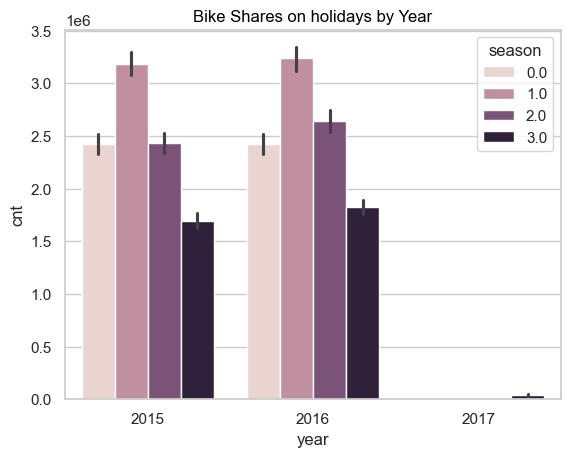

In [88]:
sns.barplot(data=df, x='year', y='cnt', hue='season', estimator=sum)
plt.title('Bike Shares on holidays by Year', color= "black")
plt.show()

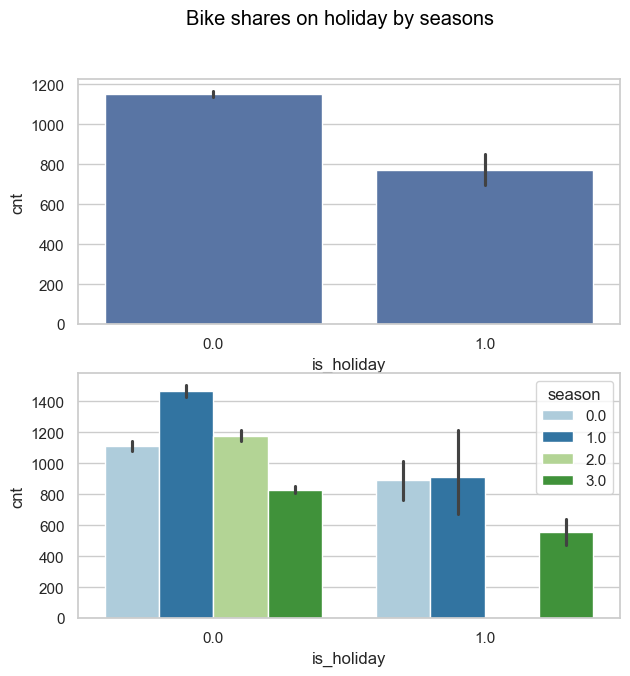

In [89]:
fig, ax = plt.subplots(2, 1, figsize=(7,7))
sns.barplot(data=df, x='is_holiday', y='cnt', ax=ax[0])

sns.barplot(data=df, x='is_holiday', y='cnt', hue='season', ax=ax[1], palette="Paired")
plt.suptitle("Bike shares on holiday by seasons", color= "black")
plt.show()

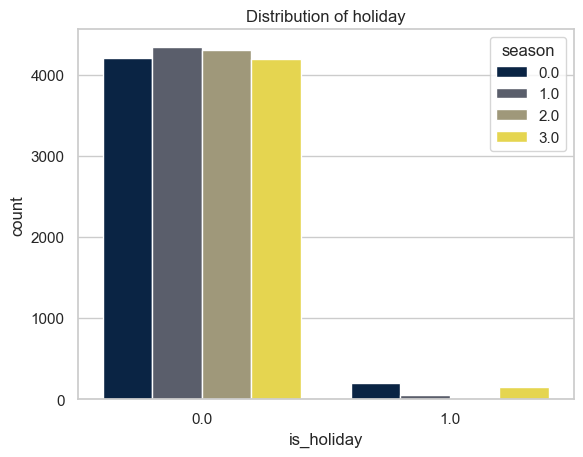

In [90]:
plt.subplots()
sns.countplot(data = df, x = 'is_holiday', hue = 'season', palette="cividis")
plt.title("Distribution of holiday")
plt.tight_layout
plt.show()

In [91]:
# Grafikte belirtilen mevsimlere gore Kis(0.0), Ilk Bahar(1.0), Yaz(2.0), Fall(3.0)

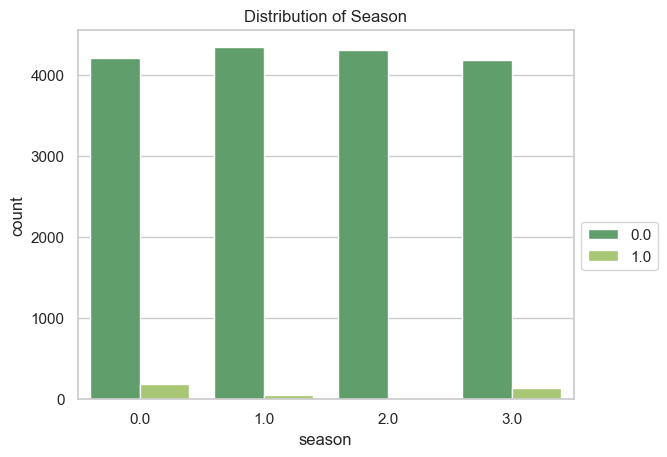

In [92]:
plt.subplots()
sns.countplot(data=df, x = 'season', palette="summer", hue='is_holiday')
plt.title("Distribution of Season")
plt.legend(bbox_to_anchor= (1, 0.5))
plt.show()

In [ ]:
# 

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [168]:
df["is_weekend"].value_counts()


is_weekend
0.0    12444
1.0     4970
Name: count, dtype: int64

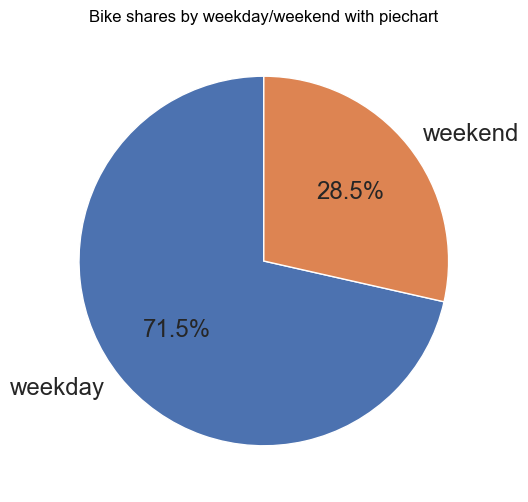

In [169]:
fig, ax=plt.subplots(figsize=(10, 6))


ax.set_title('Bike shares by weekday/weekend with piechart', color="black")
ax.pie(x=df['is_weekend'].value_counts().values,
      labels=['weekday', 'weekend'],
       autopct="%.1f%%",
      textprops=({'size': 'x-large'}),startangle=90)
plt.show()

In [170]:
df["season"].value_counts().values

array([4394, 4387, 4330, 4303], dtype=int64)

In [171]:
df_pie = df.groupby(['season'])['cnt'].sum().reset_index()

In [172]:
df_pie.value_counts().index

MultiIndex([(0.0, 4850236),
            (1.0, 6424609),
            (2.0, 5073040),
            (3.0, 3558087)],
           names=['season', 'cnt'])

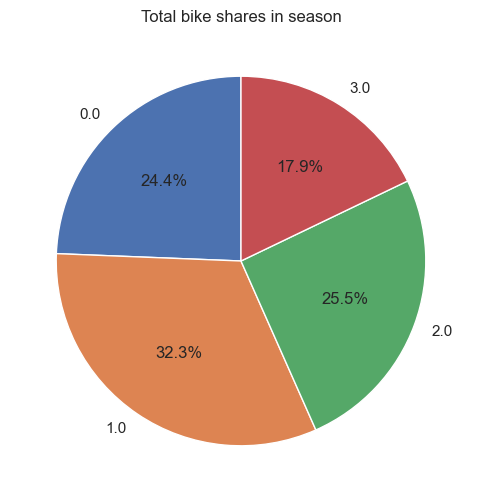

In [173]:
fig, ax=plt.subplots(figsize=(12,6))
ax.pie(x=df_pie.cnt, labels=df_pie.season, autopct='%1.1f%%', startangle=90)
ax.set_title('Total bike shares in season')
plt.show()

In [174]:
df["is_weekend"].value_counts().values

array([12444,  4970], dtype=int64)

In [175]:
df_pie = df.groupby(['is_weekend','season'])['cnt'].sum().reset_index()

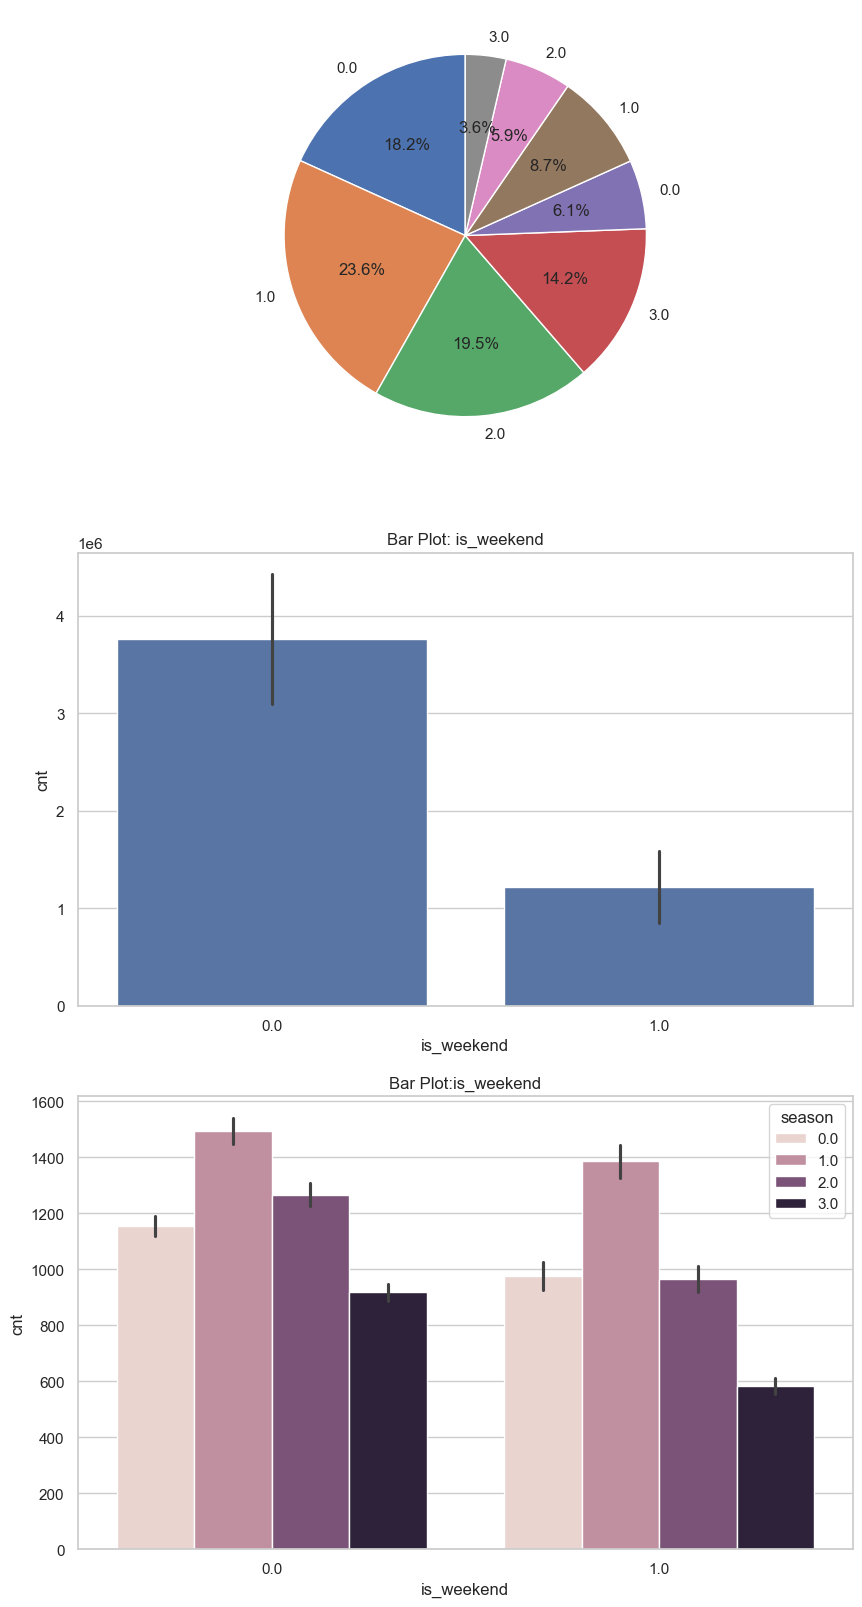

In [176]:
fig, ax = plt.subplots(3, 1, figsize=(10,20))

ax[0].pie(x=df_pie.cnt, labels=df_pie.season, autopct='%1.1f%%', startangle=90)

sns.barplot(data=df_pie, x='is_weekend', y='cnt', ax=ax[1])
ax[1].set_title('Bar Plot: is_weekend')

sns.barplot(data=df, x='is_weekend', y='cnt', hue='season', ax=ax[2])
ax[2].set_title('Bar Plot:is_weekend')
plt.show()

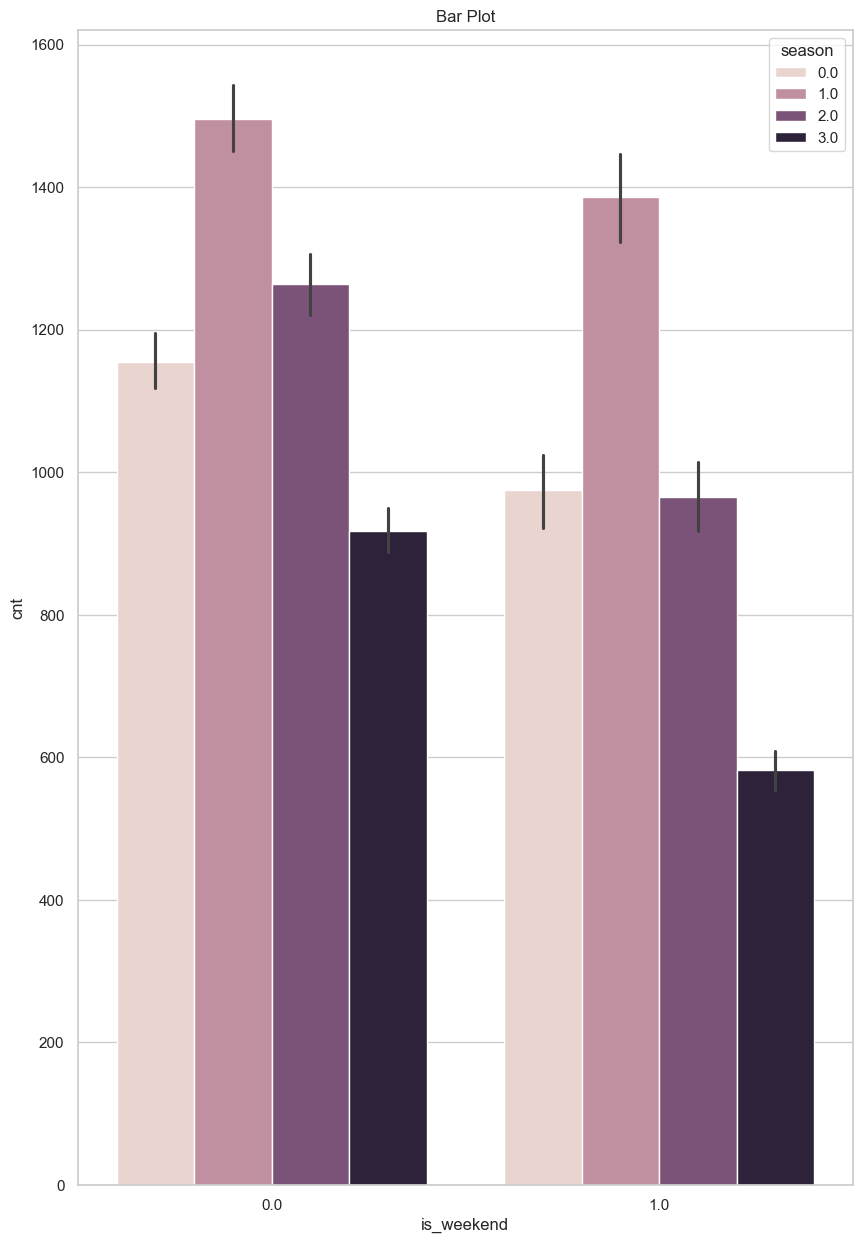

In [96]:
fig, ax=plt.subplots(figsize=(10, 15))
sns.barplot(data=df, x= 'is_weekend', y = 'cnt', hue='season', ax=ax)
ax.set_title('Bar Plot')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

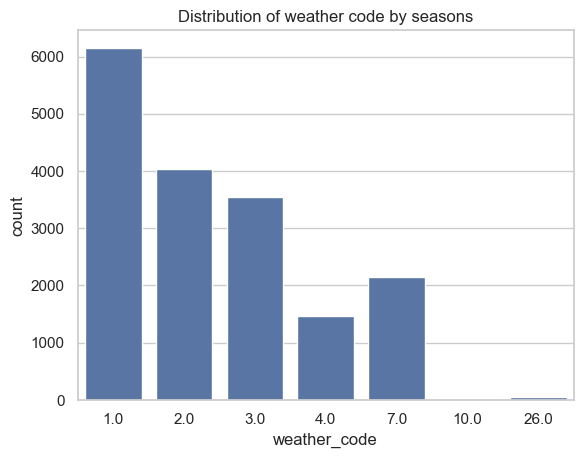

In [178]:
plt.subplots()
sns.countplot(x="weather_code", data=df)
plt.title("Distribution of weather code by seasons")
plt.show()


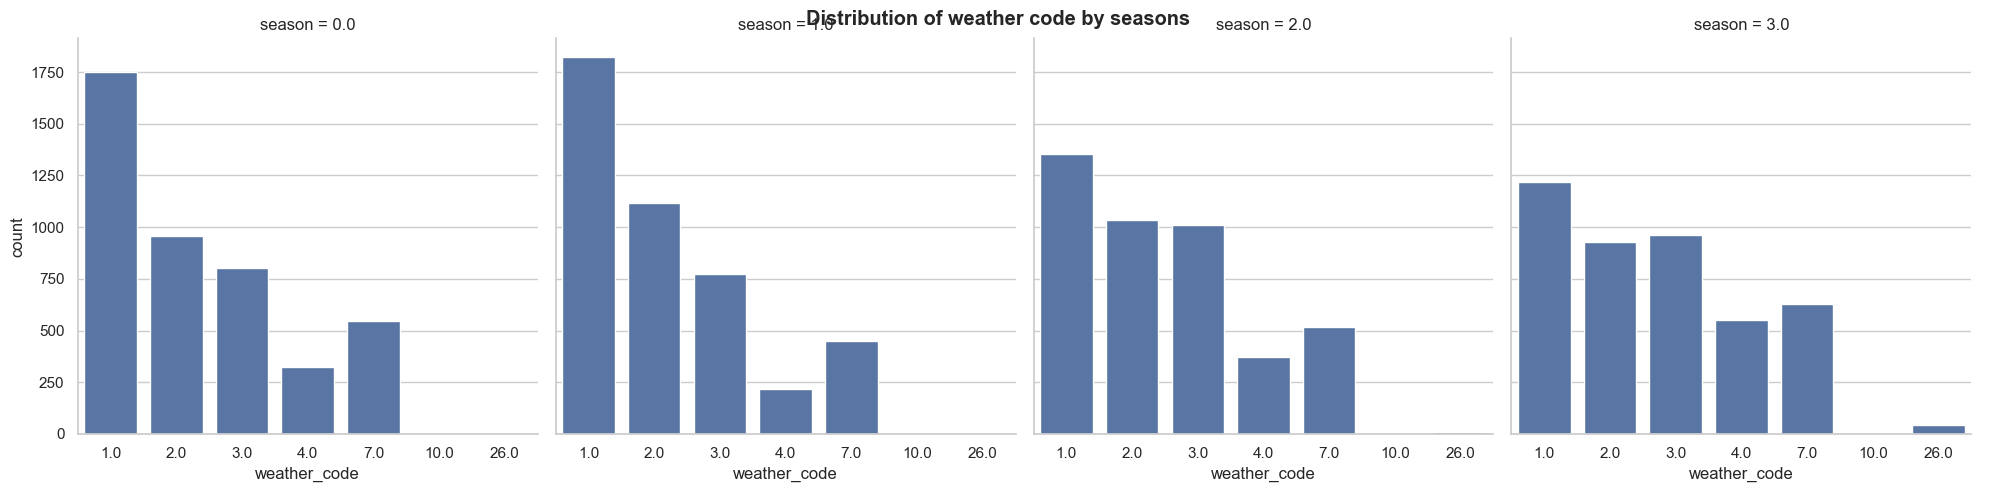

In [98]:
sns.catplot(x="weather_code", data=df, col="season", kind="count")
plt.suptitle("Distribution of weather code by seasons", fontweight="bold")
plt.show()

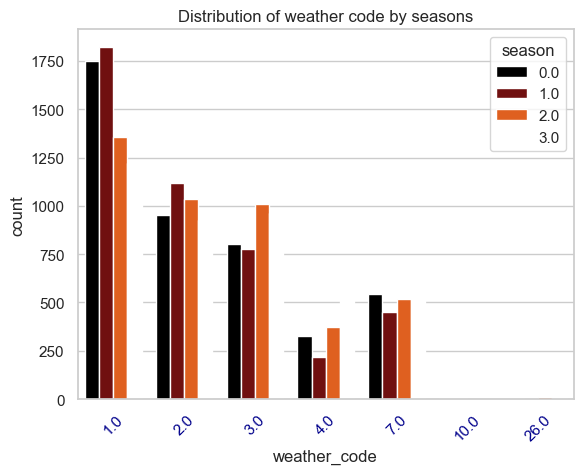

In [122]:
plt.subplots()
sns.countplot(x="weather_code", data=df, hue='season', palette = "gist_heat")
plt.title("Distribution of weather code by seasons")
plt.xticks(rotation=45, color='darkblue')

plt.show()

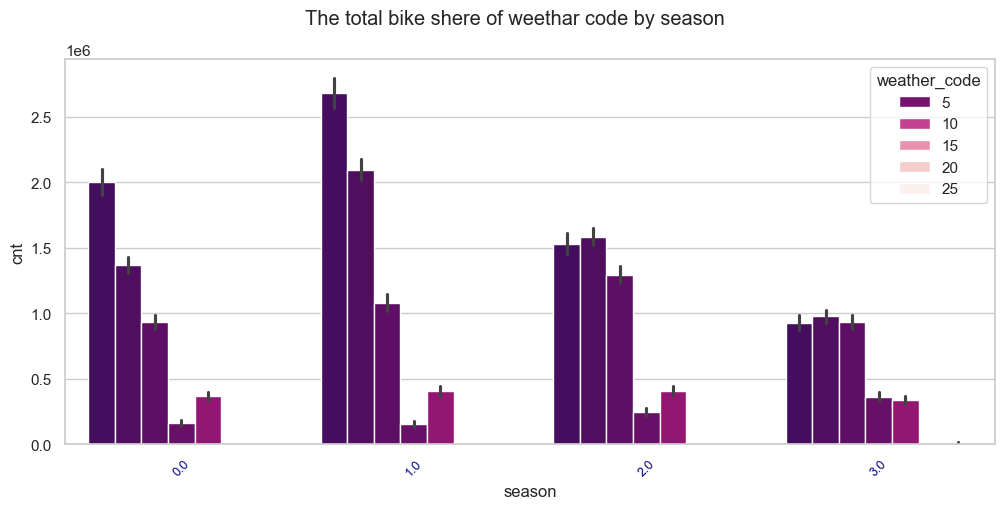

In [119]:
plt.subplots(figsize=(12,5))
sns.barplot(x = 'season', data=df, y = 'cnt', hue = 'weather_code', palette="RdPu_r", estimator=sum)
plt.suptitle("The total bike shere of weethar code by season")
plt.xticks(rotation=45, color='darkblue')
plt.tick_params(axis= 'x', labelsize=9)
plt.show()

# Bike shares by temperature

In [179]:
df.t1

0        3.0
1        3.0
2        2.5
3        2.0
4        2.0
        ... 
17409    5.0
17410    5.0
17411    5.5
17412    5.5
17413    5.0
Name: t1, Length: 17414, dtype: float64

In [180]:
df_sumt=df.groupby('t1').cnt.sum()
df_sumt

t1
-1.5       426
-1.0      7046
-0.5     14689
 0.0     24250
 0.5     13437
         ...  
 32.0    10420
 32.5    12215
 33.0     6777
 33.5     7362
 34.0     9221
Name: cnt, Length: 73, dtype: int64

In [182]:
df_sumt.max()

981231

In [191]:
df_sumt.value_counts

<bound method IndexOpsMixin.value_counts of t1
-1.5       426
-1.0      7046
-0.5     14689
 0.0     24250
 0.5     13437
         ...  
 32.0    10420
 32.5    12215
 33.0     6777
 33.5     7362
 34.0     9221
Name: cnt, Length: 73, dtype: int64>

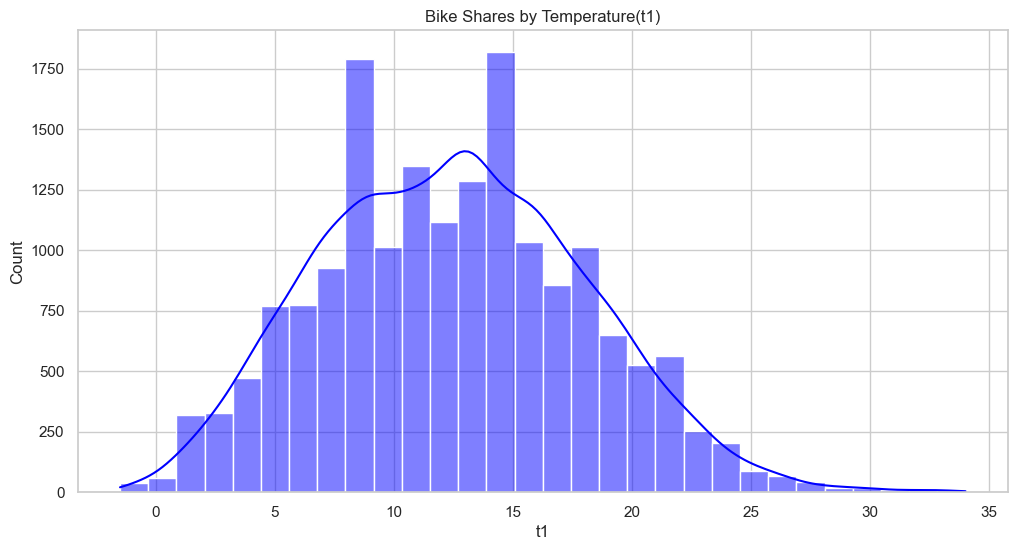

In [192]:
#Histogram for temperature t1

plt.figure(figsize=(12, 6))
sns.histplot(df, x= 't1', bins=30, kde=True, color="blue")
plt.title("Bike Shares by Temperature(t1)")
plt.show()

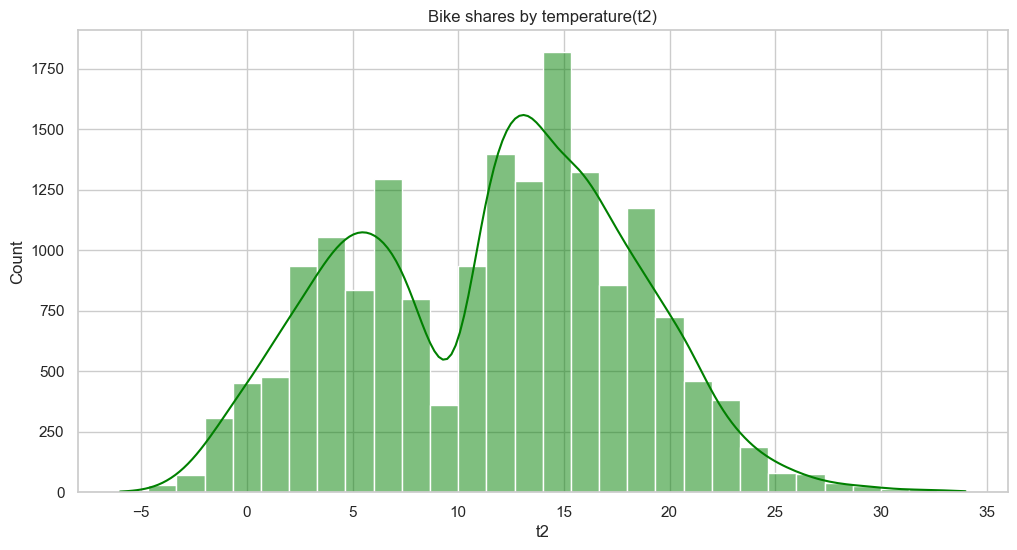

In [193]:
# Histogram for temperature t2
plt.figure(figsize=(12, 6))
sns.histplot(df, x = 't2', bins=30, kde=True, color="green")
plt.title("Bike shares by temperature(t2)")
plt.show()

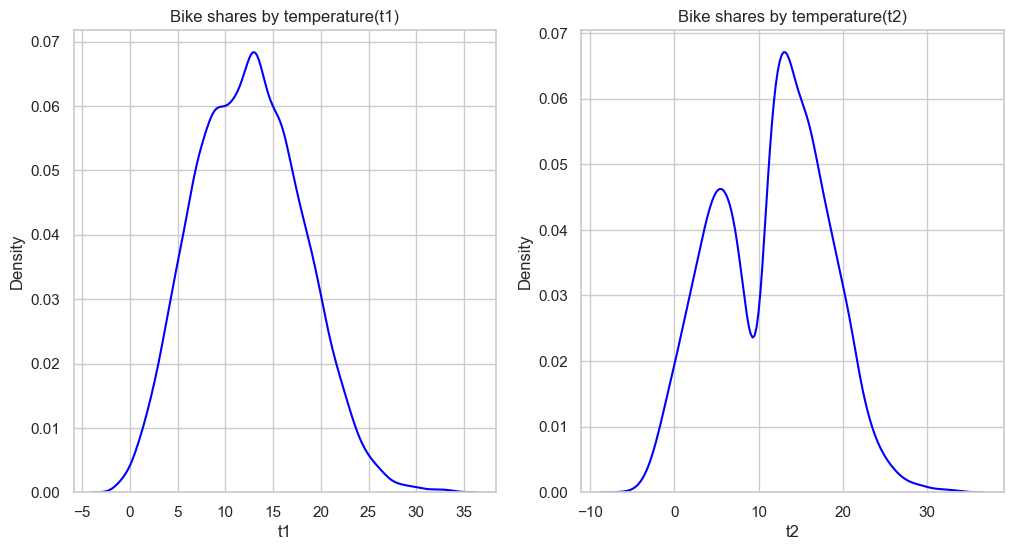

In [194]:
plt.figure(figsize=(12, 6))
# Density plot for temperature t1
plt.subplot(1, 2, 1)
sns.kdeplot(df['t1'],  color="blue")
plt.title("Bike shares by temperature(t1)")
         
# Density plot for temperature t2
plt.subplot(1, 2, 2)
sns.kdeplot(df['t2'],  color="blue")
plt.title("Bike shares by temperature(t2)")

plt.show()


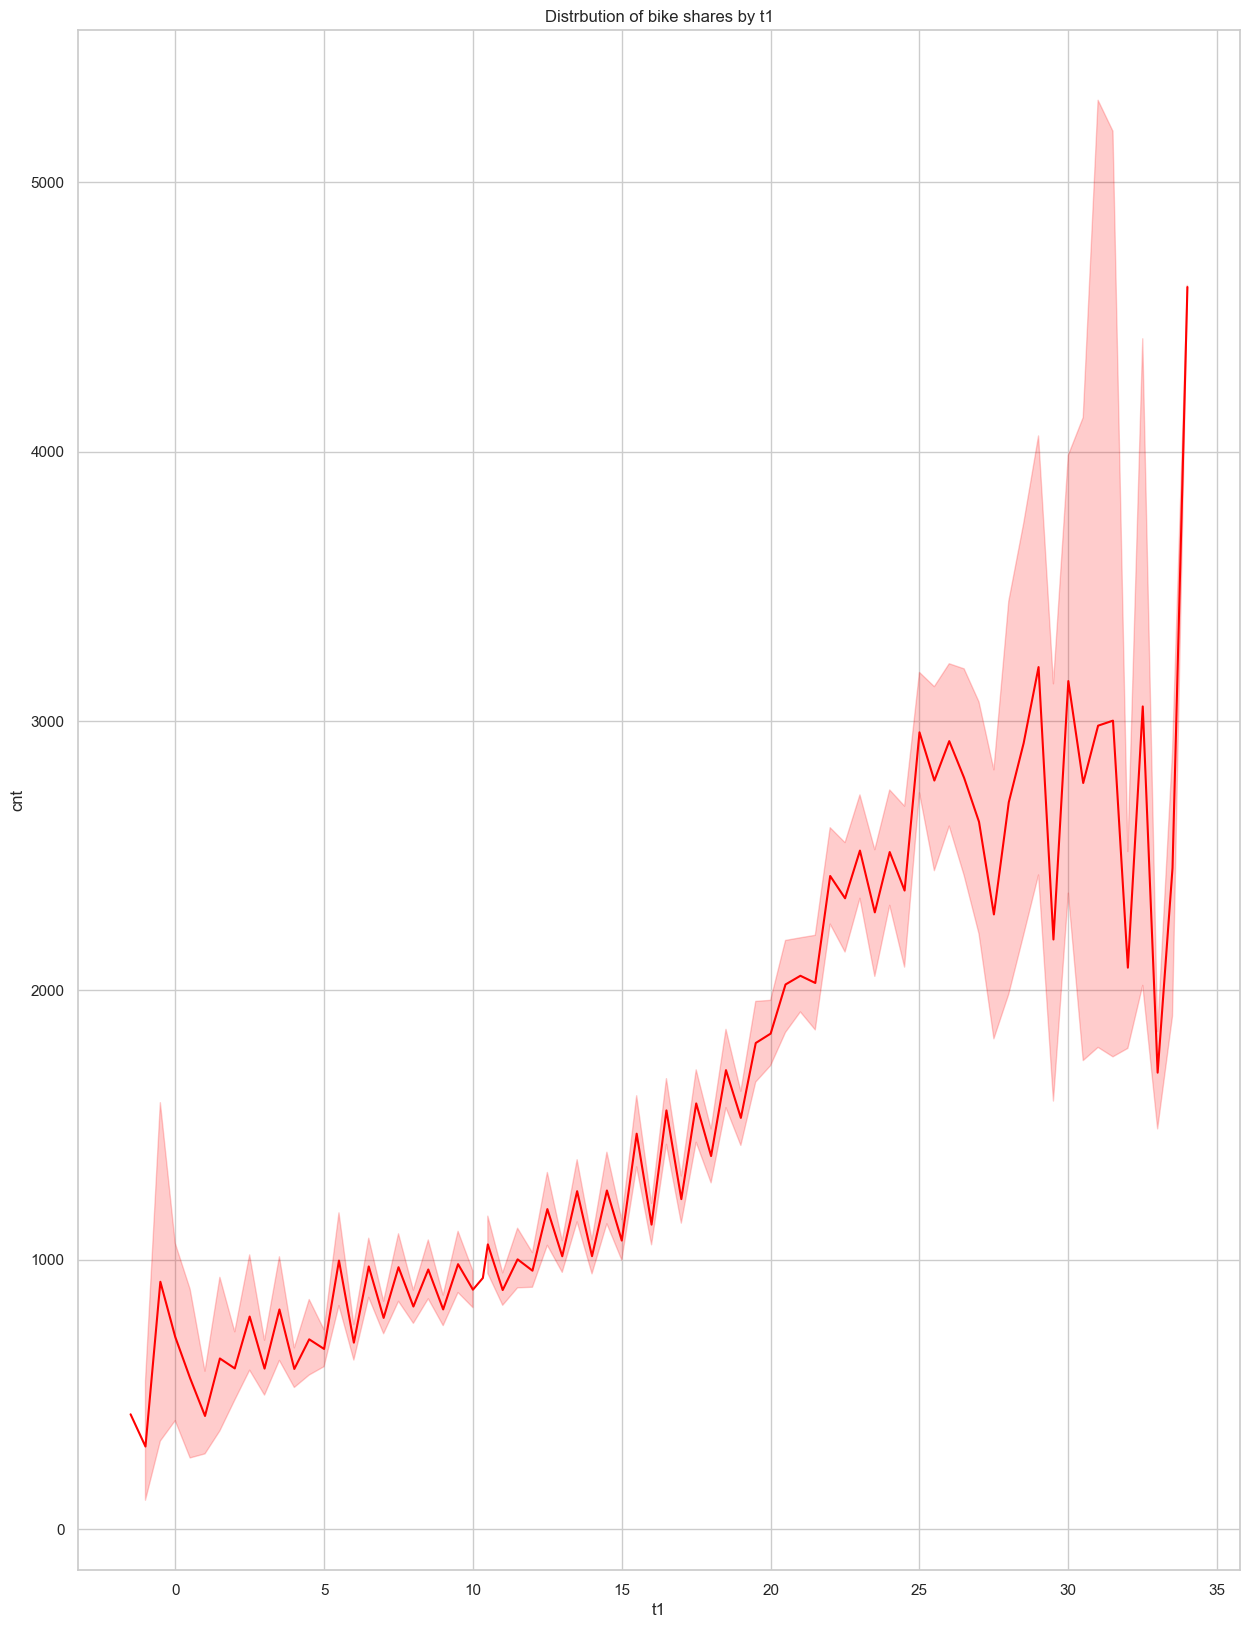

In [196]:
fig, ax = plt.subplots(figsize=(15, 20))
# line chart
sns.lineplot(data= df, x='t1', y='cnt', color= "red")
ax.set_title('Distrbution of bike shares by t1')
plt.show()

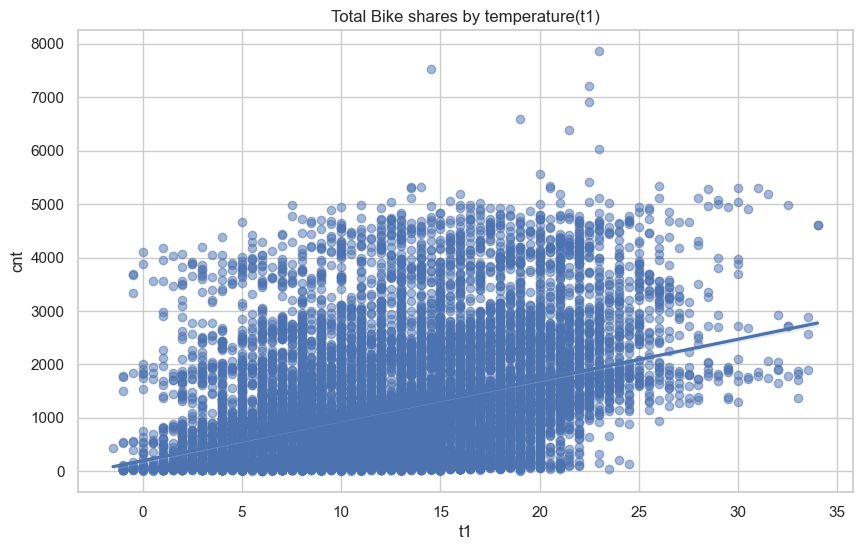

In [197]:
plt.figure(figsize=(10, 6))
sns.regplot(x='t1', y='cnt', data=df, scatter_kws={'alpha':0.5})
plt.title("Total Bike shares by temperature(t1)")
plt.show()

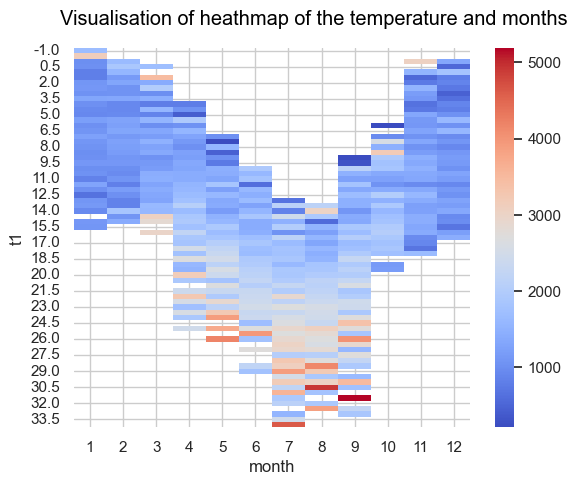

In [108]:
ax = sns.heatmap(pd.pivot_table(data=df[df['hour']>6],index='t1', columns='month',
                               values='cnt', aggfunc='mean'), cmap= 'coolwarm')
ax.set_xticklabels(df.month.unique())

plt.suptitle('Visualisation of heathmap of the temperature and months', color="black")
plt.subplots_adjust(top=0.90)
plt.show()

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

In [ ]:
# In both years, the use of bicycle reaches its maximum in June,July, August which are the months of summer.
# It decreases to its minimum in the winter month of December, January and February, because of cold
# and harsh weather.

#Bicycle use is also seen during peak morning and evening commute hours.

#Temperature (t1=0.39 and 0.32)have the higest the number of new bike shares.

In [ ]:
# Seasonal trend- There might be peaks during certain seasons,
#such as spring and summer,indicating higher bike usage during warmer weather.

#Holidays and Special Events-Spikes on specific days could correspond to holidays,
#weekends,or special events that increase bike demand.

#Daily Variability-The variability in bike shares from one day to another can provide
#insight into daily commuting patterns, weather impact,and other factors affecting bike usage.

#A relatively stable trend across certain periods could suggest consistent daily usage,
#potentially for commuting purposes.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |